# Project 4

I picked a recent event that everyone knows: The NFL Super Bowl. There are 3 things everyone loves about this event. First, the game itself. Second the Halftime show with some better and some worse performances in the past. And third, the commercials during the breaks. So, I decided to analysis the data of the commercials during the super bowl. 

In [2]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sqlalchemy import create_engine
import statistics
import os
from scipy import stats
import scipy.stats 
import re
from bs4 import BeautifulSoup
import requests


## Data acquisition and data wrangling

During data acquisition I looked at different sources to find the right data set. In Kaggle I found a csv, that includes all the Super Bowl Commercials in the Super Bowl history. With that I had a solid base to work with. 

In [43]:
ads=pd.read_csv('csv/superbowl-ads2.csv')

In [4]:
ads.head()

,Year,Product Type,Product/Title,Plot/Notes,Furthernotes,Unnamed: 5
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,NaN,NaN
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,NaN,NaN
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,NaN,NaN
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,NaN,NaN
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",NaN,NaN


In [5]:
ads.dtypes

Year             object
Product Type     object
Product/Title    object
Plot/Notes       object
Furthernotes     object
Unnamed: 5       object
dtype: object

In [6]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
Year             563 non-null object
Product Type     563 non-null object
Product/Title    562 non-null object
Plot/Notes       548 non-null object
Furthernotes     22 non-null object
Unnamed: 5       2 non-null object
dtypes: object(6)
memory usage: 26.5+ KB


In [7]:
ads=ads[ads['Year'].str.startswith(('2','1'))]

In [8]:
ads.head()

,Year,Product Type,Product/Title,Plot/Notes,Furthernotes,Unnamed: 5
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,NaN,NaN
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,NaN,NaN
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,NaN,NaN
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,NaN,NaN
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",NaN,NaN


When I went through the data, I realised that the Company name and the product is in the same column. That would make it quite hard to visualise and to filter it. Therefore I decided to split it up into 2 columns.

In [9]:
ads['Brand']=ads['Product/Title']

In [10]:
text=ads['Brand']

I used Regex to create a column with only the company name in it. So I tried to delete the part between two quotation marks, as this was the product. 

In [11]:
def split(Brand):
    return re.sub('(("+\S(\S*\s*){1,10}"*)+)|(([\d*])*)|(N/A)','',Brand)

    

In [12]:
ads['Brand']=ads['Brand'].apply(split)

In [13]:
pd.set_option('display.max_rows', 562)

Unfortunatly there were still a few names left, that were not spelt right or had to be added manually.

In [14]:
ads['Brand'][562]='Facebook'

In [15]:
ads['Brand'][560]='Pop-Tarts Pretzel'

In [16]:
ads['Brand'][558]='Doritos'

In [17]:
ads['Brand'][554]='Porsche Taycan'

In [18]:
ads['Brand'][552]='Kia Seltos'

In [19]:
ads['Brand'][551]='Jeep'

In [20]:
ads['Brand'][550]='GMC Hummer EV'

In [21]:
ads['Brand'][548]='Hyundai Sonata'

In [22]:
ads['Brand'][547]='Audi e-tron Sportback'

In [23]:
ads['Product/Title']=ads['Product/Title'].str.replace(r"[\"]+", '"')

In [24]:
ads

,Year,Product Type,Product/Title,Plot/Notes,Furthernotes,Unnamed: 5,Brand
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,NaN,NaN,Chrysler
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,NaN,NaN,Pontiac
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,NaN,NaN,Master Lock
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,NaN,NaN,Xerox
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",NaN,NaN,Coca-Cola
5,1981,Camera,"Polaroid""Now with a Flash""",A couple walks in a park. The man shows that n...,NaN,NaN,Polaroid
6,1982,Computer,"RadioShack""Color Computer""",A commercial for the TRS-80 computer.,NaN,NaN,RadioShack
7,1982,Restaurant,"McDonald's""Hopscotch""",Two kids are playing hopscotch while singing t...,NaN,NaN,McDonald's
8,1984,Computer,"Apple Inc.""1984""",In what some call the greatest Super Bowl comm...,NaN,NaN,Apple Inc.
9,1984,Computer,"Atari""Get Started""",NaN,NaN,NaN,Atari


With another function and the help of Regex I created a column with the products. The products will describe the name of the commercial or sometimes just tell the name of the product that the commercial is about. 

In [25]:
def title(product):
    return re.findall(r'["](.*?)["]',product)

In [26]:
ads['Product']=ads['Product/Title'].apply(title).str[0]

In [27]:
ads['Product2']=ads['Plot/Notes'].apply(lambda x: title(str(x))).str[0]

In [28]:
ads['Product']= ads['Product'].fillna(value=ads['Product2'])

I furthermore got rid of a few unnecessary columns

In [29]:
ads.drop(columns='Product2', inplace=True)

In [30]:
ads.drop(columns='Furthernotes', inplace=True)

In [31]:
ads.drop(columns='Unnamed: 5', inplace=True)

In [32]:
ads

,Year,Product Type,Product/Title,Plot/Notes,Brand,Product
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,Chrysler,Scuba Diver
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,Pontiac,Humbler
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,Master Lock,Rifle
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,Xerox,Monks
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",Coca-Cola,"Hey Kid, Catch!"
5,1981,Camera,"Polaroid""Now with a Flash""",A couple walks in a park. The man shows that n...,Polaroid,Now with a Flash
6,1982,Computer,"RadioShack""Color Computer""",A commercial for the TRS-80 computer.,RadioShack,Color Computer
7,1982,Restaurant,"McDonald's""Hopscotch""",Two kids are playing hopscotch while singing t...,McDonald's,Hopscotch
8,1984,Computer,"Apple Inc.""1984""",In what some call the greatest Super Bowl comm...,Apple Inc.,1984
9,1984,Computer,"Atari""Get Started""",NaN,Atari,Get Started


For some reasons some brands were not able to group. Therefore I had to create a function that spells the same brands in the same way. 

In [33]:
def brand_cleaning(x,row):
    if x in row['Brand']:
        return x
    else:
        return row['Brand']

In [34]:
ads['Brand']=ads.apply(lambda row: brand_cleaning('Kia',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Iron Man',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Intel',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Independence Day',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Hyundai',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Honda',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('GoDaddy',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Fiat',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Chrylser',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Chevrolet',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Avengers',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Audi',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('WeatherTech',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Jeep',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Bud Light',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Doritos',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Budweiser',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Coca-Cola',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Pepsi',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Toyota',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Snickers',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Skechers',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Nissan',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('NFL',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Monster',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Mercedes_Benz',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('McDonald',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('M&M',row), axis=1)
ads['Brand']=ads.apply(lambda row: brand_cleaning('Lexus',row), axis=1)

In [35]:
adds_amount=ads.groupby('Brand', as_index=False).agg({'Product/Title':'count'}).sort_values(by='Product/Title', ascending=False).head(400)


In [36]:
adds_amount.columns=['Brand', 'Amount']

In [37]:
adds_amount=adds_amount[adds_amount['Amount']!=1]

### Amount of commercials per brand in the Super Bowl history

I created a first graph that shows the brands and the amount of commercials in the history of Superbowl

<BarContainer object of 61 artists>

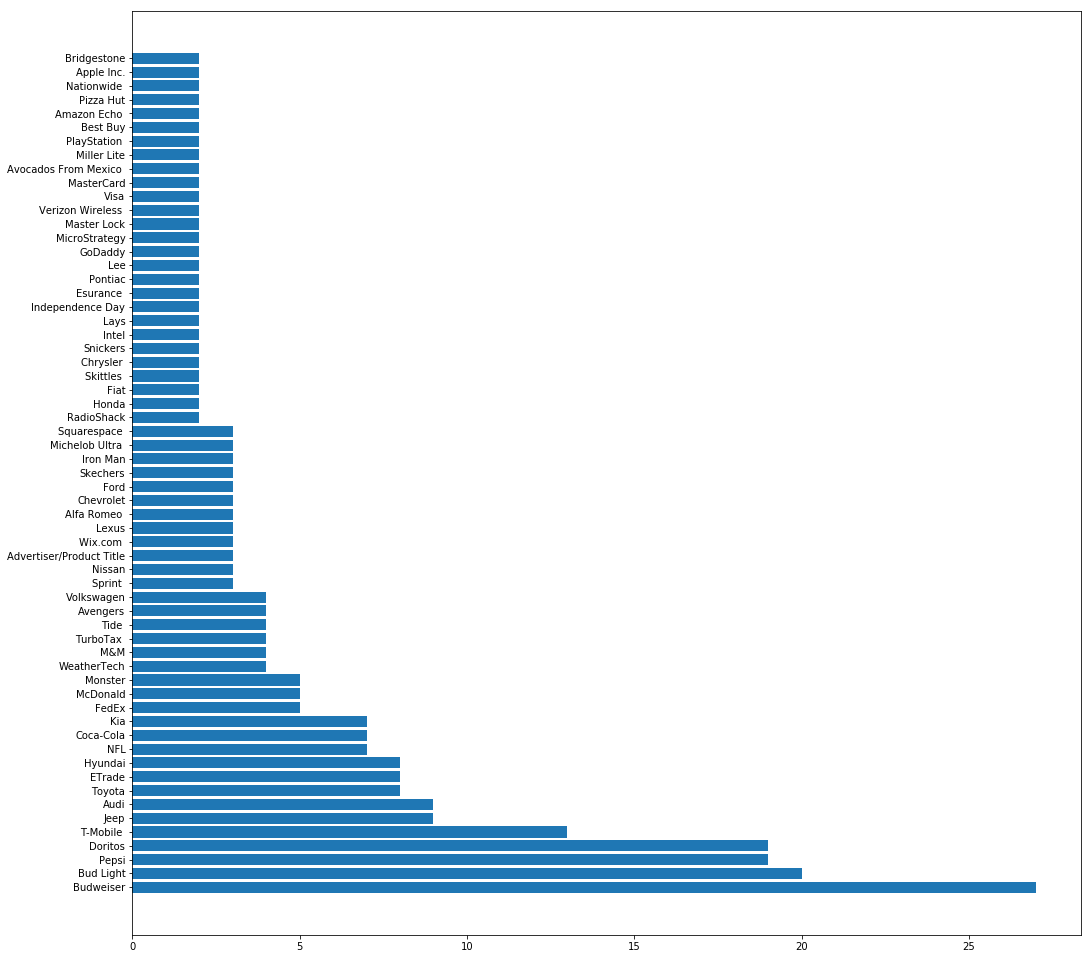

In [38]:
plt.figure(figsize=(17,17))
plt.barh(adds_amount.Brand, adds_amount.Amount)

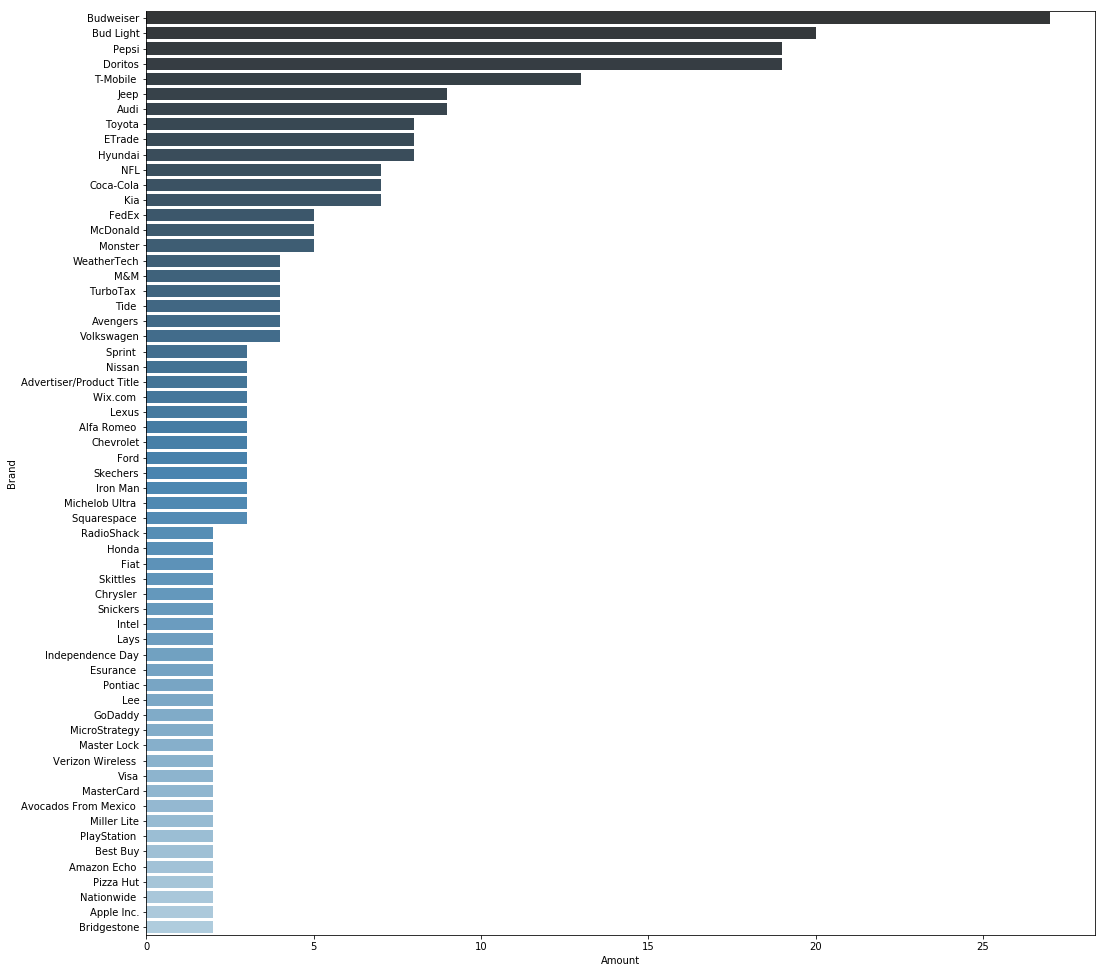

In [39]:
fig, ax = plt.subplots(figsize=(17,17))
sns.barplot(x='Amount',y='Brand', data=adds_amount, label='Amount', palette='Blues_d')

In [40]:
len(adds_amount.Amount)

61

In Tableau I created the following graph with the sum of commercials for each brand in the history of Super Bowl

<img src="Tableau/amount_of_commercials_per_brand.png">

Also was it nice to summarise the type of commercials that have been shown in the history of Super Bowl

<img src="Tableau/type_of_commercials.png">

## Webscraping viewers and cost per commercial in the Super Bowl history

I decided to add more data to my dataframe. So therefore I webscraped a table from https://superbowl-ads.com/cost-of-super-bowl-advertising-breakdown-by-year/. 

In [41]:
url = 'https://superbowl-ads.com/cost-of-super-bowl-advertising-breakdown-by-year/'
html = requests.get(url).content
html[0:600]

b'<!DOCTYPE html>\r\n<!--[if IE 7]>\r\n<html class="ie ie7" lang="en-US" prefix="og: http://ogp.me/ns#">\r\n<![endif]-->\r\n<!--[if IE 8]>\r\n<html class="ie ie8" lang="en-US" prefix="og: http://ogp.me/ns#">\r\n<![endif]-->\r\n<!--[if !(IE 7) | !(IE 8)  ]>-->\r\n<html lang="en-US" prefix="og: http://ogp.me/ns#">\r\n<!--<![endif]--><head>\r\n<meta charset="UTF-8">\r\n<meta name="viewport" content="width=device-width, initial-scale=1">\r\n<link rel="profile" href="https://gmpg.org/xfn/11">\r\n<link rel="pingback" href="https://superbowl-ads.com/xmlrpc.php">\r\n<title>Cost of Super Bowl Advertising Breakdown by Year - Superbo'

In [42]:
soup=BeautifulSoup(html, 'lxml')
rows=soup.find_all(attrs={'class':['xl73','xl64','xl49','xl47','xl46']})
sb_dates=['Feb 2 2020', 'Feb 4 2019']
for elements in rows:
    sb_dates.append(elements.text)
sb_dates
len(sb_dates)

55

In [43]:
soup=BeautifulSoup(html, 'lxml')
rows=soup.find_all(attrs={'class':['xl81','xl70','xl38','xl42']})
sb_costs=['5,600,000', '5,200,000']
for elements in rows:
    sb_costs.append(elements.text.replace('$','').replace(',',''))
len(sb_costs)

55

In [44]:
soup=BeautifulSoup(html, 'lxml')
rows=soup.find_all(attrs={'class':['xl80','xl68','xl39']})
sb_viewers=['100,500,000', '98,500,000']
for elements in rows:
    sb_viewers.append(elements.text.replace(',',''))

In [45]:
sb_years=list(range(1966,2021))
sb_years.sort(reverse=True)


In [46]:
dictionary_costs=dict(zip(sb_years,sb_costs))
dictionary_viewers=dict(zip(sb_years,sb_viewers))

In [47]:
def costs(row):
    x=int(row['Year'])
    return dictionary_costs[x]
ads['Cost_per_add']=ads.apply(lambda row: costs(row), axis=1)


In [48]:
def viewers(row):
    x=int(row['Year'])
    return dictionary_viewers[x]
ads['Viewers']=ads.apply(lambda row: viewers(row), axis=1)


In [46]:
import csv

In [47]:
ads.to_csv('csv/superbowl_advertisements.csv', sep=',', quoting=csv.QUOTE_NONNUMERIC)

So, once I added the values of the viewers and prices for each year I was able to create a graph that shows the unique viewers and the price for each commercial over time.

<img src="Tableau/viewers_vs_price.png">

I added the price the summed amount of commercials for each brand and created a graph that shows the top 4 companies that spent the most amount of money for commercials in Super Bowl history:

<img src="Tableau/top4_spending.png">

## List with share values

I wanted to see if a commercial during the Super Bowl has an impact on the share value of the company. For this I need to get the share values before and after event from the companies. To get a share value I had to add the share ticker of each company to my dataframe. This was not easy, as I did not have the proper company name in the list. E.g. Apple Inc. was only as "Apple" in the list. Therefore I had to find a way to somehow match the to tables. 

In [42]:
shares=pd.read_csv('csv/shares.csv')
shares.head(1000)

,Ticker,Name,Sector,Industry,Price,Collection
0,A,Agilent Technologies Inc.,Healthcare,Medical Laboratories & Research,WIKI/A,stocks/a
1,AA,Alcoa Inc.,Basic Materials,Aluminum,WIKI/AA,stocks/aa
2,AAME,Atlantic American Corp.,Financial,Life Insurance,NaN,stocks/aame
3,AAN,"Aaron's, Inc.",Services,Rental & Leasing Services,WIKI/AAN,stocks/aan
4,AAON,AAON Inc.,Industrial Goods,General Building Materials,WIKI/AAON,stocks/aaon
5,AAP,Advance Auto Parts Inc.,Services,Auto Parts Stores,WIKI/AAP,stocks/aap
6,AAT,"American Assets Trust, Inc.",Financial,REIT - Retail,NaN,NaN
7,AAPL,Apple Inc.,Consumer Goods,Electronic Equipment,WIKI/AAPL,stocks/aapl
8,AAWW,Atlas Air Worldwide Holdings Inc.,Services,"Air Services, Other",WIKI/AAWW,stocks/aaww
9,ABAX,"Abaxis, Inc.",Healthcare,Diagnostic Substances,WIKI/ABAX,stocks/abax


In [52]:
shares['Name'].fillna("0", inplace=True)

In [53]:
def checker_ticker(string):
    name = shares.Name.tolist()
    ticker = shares.Ticker.tolist()

    for n, t in zip(name, ticker):
        if string.lower() in n.lower():
            return t


In [54]:
ads['Ticker'] = ads.Brand.apply(checker_ticker)

In [55]:
ads_Ticker=ads[ads.Ticker.notnull()]

In [56]:
ads_Ticker.shape

(97, 9)

In [57]:
from alpha_vantage.timeseries import TimeSeries
# Your key here
key = 'OD9ANSLG4J4MHQEL'
ts = TimeSeries(key)
x, meta = ts.get_daily(symbol='PEP')
print(x['2020-02-14'])

{'1. open': '146.5700', '2. high': '147.1500', '3. low': '145.9400', '4. close': '146.9900', '5. volume': '3555977'}


In [58]:
def value_before (row):
    x, meta = ts.get_daily(symbol=row['Ticker'])
    print(x['2020-02-14'])

I added another column called "Ticker" that shows the Ticker for all the companies that are listed.

In [59]:
ads.head()

,Year,Product Type,Product/Title,Plot/Notes,Brand,Product,Cost_per_add,Viewers,Ticker
0,1969,Car,"Chrysler ""Scuba Diver""[4]",A scuba diver in a dreamy sequence with groovy...,Chrysler,Scuba Diver,55000,41660000,None
1,1970,Car,"Pontiac""Humbler""",A young man pulled up in his GTO to a drive-in...,Pontiac,Humbler,78200,44270000,None
2,1975,Security,"Master Lock""Rifle""",A man attempts to break a Master Lock with a r...,Master Lock,Rifle,107000,56050000,None
3,1976,Copy,"Xerox""Monks""",A monk must make 500 handwritten scriptures fo...,Xerox,Monks,110000,57710000,XRX
4,1979,Soft drink,"Coca-Cola""Hey Kid, Catch!""","A young kid tries to talk to ""Mean"" Joe Greene...",Coca-Cola,"Hey Kid, Catch!",185000,74740000,CCE


Unfortunatly the API would only let me get 5 APIs a day. At the end I skiped this because I tried to get more interesting output for our very heterogen audience for this project. The following function could have given us all the values before and after the event for each listed company: 

In [40]:
#ads['Value_before'] = ads_Ticker.apply(lambda row: value_before(row),axis=1)

## Twitterscraping

After I analysed the increase of the commercial price in the history, I also wanted to analyse the effectiveness of the commercials. Herefore I used Twitterscraping to get the amount of Tweets that mentioned the commercial brand during the Super Bowl event. I used the hashtag #superbowlcommercials and tracked the mentioning between 20.1.20 and 20.2.20. 

In [61]:
from twitterscraper import query_tweets
import datetime as dt

INFO: {'User-Agent': 'Mozilla/5.0 (Windows NT 5.2; RW; rv:7.0a1) Gecko/20091211 SeaMonkey/9.23a1pre'}


In [62]:
def checker_tweet(string):
    tweet = df.text.tolist()
    count=0

    for i in tweet:
        if string in i:
            count+=1
    return count

In [67]:
begin_date= dt.date(2020,1,20)
end_date=dt.date(2020,2,20)
limit=100000
lang='english'
tweets=query_tweets("superbowlcommercials", begindate=begin_date,enddate=end_date, limit=limit, lang=lang)
df=pd.DataFrame(t.__dict__ for t in tweets)

RnP4hEjUAFQAlAFUAFQAA&q=superbowlcommercials%20since%3A2020-02-02%20until%3A2020-02-04&l=english
INFO: Using proxy 124.219.176.139:39589
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKf15Nj__CEWgMC1-caRnP4hEjUAFQAlAFUAFQAA&q=superbowlcommercials%20since%3A2020-02-02%20until%3A2020-02-04&l=english
INFO: Using proxy 157.230.162.226:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgL-Ritj__CEWgMC1-caRnP4hEjUAFQAlAFUAFQAA&q=superbowlcommercials%20since%3A2020-02-02%20until%3A2020-02-04&l=english
INFO: Using proxy 186.29.163.97:49787
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=f

In [68]:
ads_2020=ads[ads['Year']=='2020']
ads_2020['Twitter_mentions'] = ads_2020.Brand.apply(checker_tweet)

/Users/kforster/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
ads_2020

,Year,Product Type,Product/Title,Plot/Notes,Brand,Product,Cost_per_add,Viewers,Ticker,Twitter_mentions
546,2020,Beer,"Presidente ""Never Left"" ""Features Alex Rodriguez",co-owner and chairman of the brand,Presidente,Never Left,"5,600,000","100,500,000",None,1
547,2020,Car,"Audi e-tron Sportback ""Let it Go"" ""Maisie Will...",she passes by lowriders,Audi,Let it Go,"5,600,000","100,500,000",ADNC,73
548,2020,Car,"Hyundai Sonata ""Smaht Pahk"" ""John Krasinski de...",which he refers to in a thick Boston accent a...,Hyundai,Smaht Pahk,"5,600,000","100,500,000",None,57
549,2020,Car,"Genesis GV80 ""Going Away Party"" ""Chrissy Teige...","in favor of """"young luxury""""",Genesis GV old luxury,Going Away Party,"5,600,000","100,500,000",None,0
550,2020,Car,"GMC Hummer EV ""Quiet Revolution"" ""Several scen...",concluding with LeBron James sinking a slam d...,GMC Hummer EV,Quiet Revolution,"5,600,000","100,500,000",None,0
551,2020,Car,"Jeep ""Groundhog Day"" ""Groundhog Day commercial...",meeting with Punxsutawney Phil again as he is...,Jeep,Groundhog Day,"5,600,000","100,500,000",None,199
552,2020,Car,"Kia Seltos ""Tough Never Quits"" ""Rookie Josh Ja...",Oklahoma offering advice and inspiration to h...,Kia,Tough Never Quits,"5,600,000","100,500,000",None,21
553,2020,Car,"Toyota Highlander ""Heroes"" ""Driving a Toyota H...",Cobie Smulders saves the day in various movie...,Toyota,Heroes,"5,600,000","100,500,000",None,16
554,2020,Car,"Porsche Taycan ""The Heist"" ""Security professio...","a 917 K and a 918 Spyder.[227]""",Porsche Taycan,The Heist,"5,600,000","100,500,000",None,0
555,2020,Film,F9 Trailer,NaN,F Trailer,NaN,"5,600,000","100,500,000",None,0


In [66]:
ads_2020.to_csv('ads_2020_v2.csv', sep=',', quoting=csv.QUOTE_NONNUMERIC)

So, Jeep is the most mentioned brand in the Twitter Tweets in 2020. But only with a quote of 4% whicht means that only every 25th Tweet was about Jeep.

<img src="Tableau/mentioning2020.png">

After the low amount of mentioning I also wanted to compare 2020 with other years. So I had a look at 2016 and calculate the percentage of mentioning compared to the total amount of tweets for each brand.  

<img src="Tableau/mentioning2016.png">

In [70]:
begin_date= dt.date(2016,1,20)
end_date=dt.date(2016,2,20)
limit=100000
lang='english'
tweets=query_tweets("superbowlcommercials", begindate=begin_date,enddate=end_date, limit=limit, lang=lang)
df=pd.DataFrame(t.__dict__ for t in tweets)

json_resp = response.json()
  File "/Users/kforster/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/kforster/anaconda3/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/Users/kforster/anaconda3/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/kforster/anaconda3/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLCJ5uvNqhMWgsChmcjD2KsTEjUAFQAlAFUAFQAA&q=superbowlcommercials%20since%3A2016-02-07%20un

In [71]:
ads_2016=ads[ads['Year']=='2016']
ads_2016['Twitter_mentions'] = ads_2016.Brand.apply(checker_tweet)

/Users/kforster/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
ads_2016

,Year,Product Type,Product/Title,Plot/Notes,Brand,Product,Cost_per_add,Viewers,Ticker,Twitter_mentions
364,2016,Product type,Advertiser/Product Title,Plot/Notes,Advertiser/Product Title,NaN,4500000,111900000,None,0
365,2016,Beer,"Bud Light ""Bud Light Party""",Amy Schumer and Seth Rogen form a political pa...,Bud Light,Bud Light Party,4500000,111900000,None,10
366,2016,Car,"Jeep ""4x4ever""",[60][61],Jeep,4x4ever,4500000,111900000,None,34
367,2016,Car,"Jeep ""Portraits""","In honor of the brand's 75-year anniversary, a...",Jeep,Portraits,4500000,111900000,None,34
368,2016,Car,"Hyundai Genesis ""First Date""",A father (Kevin Hart) lets his son borrow his ...,Hyundai,First Date,4500000,111900000,None,62
369,2016,Car,"Honda Ridgeline ""A New Truck to Love""","A herd of sheep sing Queen's ""Somebody to Love...",Honda,A New Truck to Love,4500000,111900000,None,35
370,2016,Car accessories,"WeatherTech ""Resources""",Highlights the manufacturing process and the e...,WeatherTech,Resources,4500000,111900000,None,2
371,2016,Clothing,"Marmot ""Love the Outside""","A camper hangs outdoors with a marmot, and is ...",Marmot,Love the Outside,4500000,111900000,None,9
372,2016,Food,"Doritos ""Ultrasound""",A pregnant woman's newborn child shares her hu...,Doritos,Ultrasound,4500000,111900000,None,304
373,2016,Food,"Doritos ""Doritos Dogs""","A group of dogs evade a supermarket's ""no dogs...",Doritos,Doritos Dogs,4500000,111900000,None,304


In [44]:
ads_2016.to_csv('csv/ads_2016.csv', sep=',', quoting=csv.QUOTE_NONNUMERIC)

NameError: name 'ads_2016' is not defined

At the end I was curious why Doritos achieved such a high awareness with its commercial. Here is the reason why: https://www.youtube.com/watch?v=gaTmmwBwlKE